In [1]:
!pip install pandas scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [3]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
x=iris.data


# Step 2: Standardize the dataset (zero mean, unit variance)

In [5]:
x_mean = np.mean(x,axis=0)
x_centred = x - x_mean
x_std = np.std(x_centred,axis=0)
x_scaled = x_centred / x_std

# Step 3: Compute the covariance matrix

In [6]:
cov_matrix = np.cov(x_scaled, rowvar = False)


# Step 4: Compute eigenvalues and eigenvectors

In [7]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 5: Sort eigenvalues and eigenvectors in descending order

In [8]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 6: Select the top 2 principal components

In [9]:
top_eigenvectors = eigenvectors[:, :2]

# Step 7: Project the data onto the new feature space

In [10]:
x_pca_manual = x_scaled @ top_eigenvectors

# Step 8: Visualize the PCA results

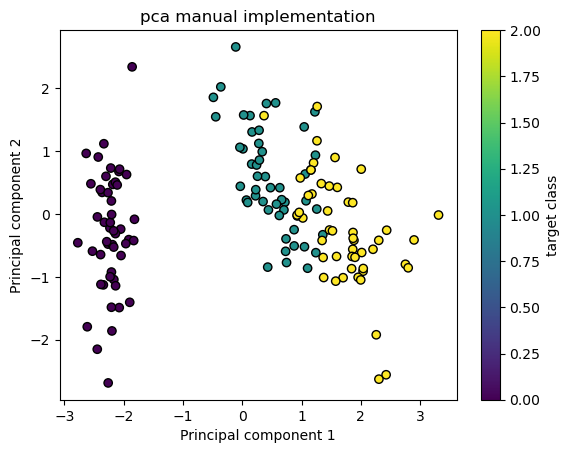

In [12]:
plt.scatter(x_pca_manual[:,0], x_pca_manual[:,1], c=iris.target, 
            cmap = 'viridis', edgecolor='k')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('pca manual implementation')
plt.colorbar(label='target class')
plt.show()

 PCA using Inbuilt Functions


# Standardize the dataset

In [17]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Apply PCA

In [20]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

# Plot the transformed data


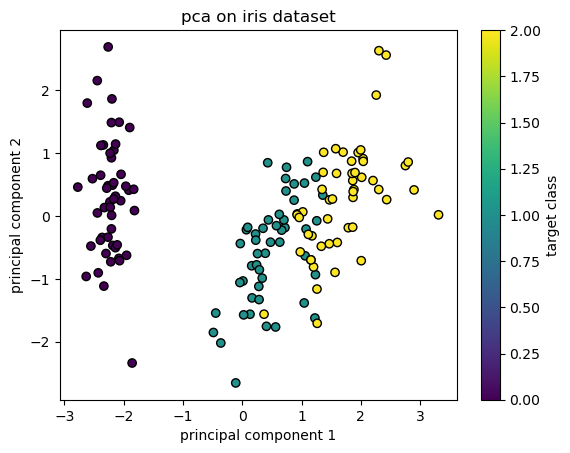

In [21]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=iris.target, 
            cmap='viridis', edgecolor='k')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('pca on iris dataset')
plt.colorbar(label='target class')
plt.show()